<a href="https://colab.research.google.com/github/vidu10/breast_cancer_wisconsin/blob/main/malignant_or_benign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

dataset=pd.read_csv('data.csv')
print(len(dataset.columns))

33


In [ ]:
x=dataset.iloc[:,2:29].values
y=dataset.iloc[:,1].values


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# **DATA PRE-PROCESSING**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier=LogisticRegression()
logistic_classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logistic_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[68  0]
 [ 5 41]]


In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel="rbf")
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svm.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[68  0]
 [ 5 41]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="entropy")
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=tree.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[67  1]
 [ 7 39]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,criterion="entropy")
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=forest.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[67  1]
 [ 3 43]]


# **BOOSTING AND OPTIMIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [ ]:
print(x_train)

[[ 1.15772267 -0.71659946  1.20680029 ...  0.6815012   1.88483977
   0.48637202]
 [ 0.14203795 -1.21844679  0.10469986 ...  0.12170429 -0.65715474
  -0.62442841]
 [ 0.27476948  0.6617462   0.25825752 ... -1.0320756   0.48478553
   0.17702354]
 ...
 [-0.52739061 -1.19300752 -0.52626728 ... -1.2500118  -0.07425754
   0.15953062]
 [ 1.90505887 -0.4390802   1.8176836  ...  1.04045494  0.30740862
   0.65807884]
 [-0.36868987 -1.35951908 -0.37940424 ... -0.53210431 -0.21065426
  -0.44213377]]


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
x_train_scaled=pca.fit_transform(x_train)
print(x_train_scaled[:10])

[[ 5.90313682]
 [-1.0230122 ]
 [ 0.05269768]
 [ 3.19783312]
 [-4.23186509]
 [-1.16093809]
 [ 0.58436447]
 [-3.14325332]
 [-2.13401959]
 [ 3.83231815]]


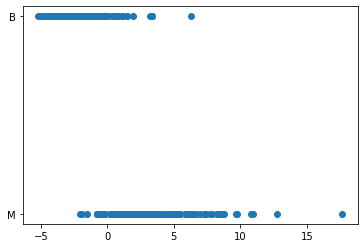

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train_scaled,y_train)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoost=GradientBoostingClassifier()
gradientBoost.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred=gradientBoost.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[68  0]
 [ 4 42]]


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=xgb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[68  0]
 [ 4 42]]
